In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Definindo estilo de plotagem: grande cinza no fundo e paleta de cores
# custom_params = {"axes.spines.right": False, "axes.spines.top"´: False}

sns.set_theme(style='darkgrid', # rc = custom_params,
              palette='colorblind', rc={'figure.figsize':(7,6)})

In [50]:
# Carregando Dataset
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# ***GRÁFICOS:***

# *Horizontal e Vertical*

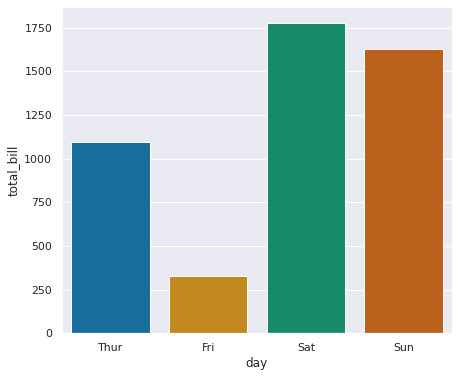

In [51]:
# https://seaborn.pydata.org/generated/seaborn.barplot.html
# Plotando um gráfico de barra

sns.barplot(
    y = 'total_bill',   # Para vertical: y = "total_bill",
    x = 'day',          # Para horizontal: x = 'day',
    data = tips,
    estimator = sum,
    ci = None,
    # color = '#69b3a2' 
);

# *Com ordenação*

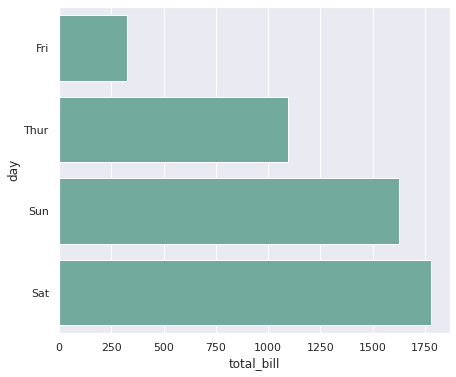

In [58]:
# Plotar o gráfico onde as barras estejam nessa ordem: ['Fri', 'Thur', 'Sun', 'Sat']

sns.barplot(
    x = 'total_bill',
    y = 'day',
    data = tips,
    estimator = sum,
    ci = None,
    order = ['Fri', 'Thur', 'Sun', 'Sat'],
    color = '#69b3a2'
);

 *Reordenar o gráfico por classificação de grupo. Por exemplo, desejo ter o grupo com o valor mais alto na parte superior e aquele com o valor mais baixo na parte inferior.*

In [ ]:
# 

import pandas as pd

df = pd.DataFrame({
    'Grupo': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    'Valor': [1, 10, 39, 23, 3, 42, 12]
})

# Reordenar o dataframe
df = df.sort_values(['Valor'], ascending = False).reset_index(drop = True)

# Gráfico
sns.barplot(
    x = 'Valor',
    y = 'Grupo',
    data = df,
    estimator = sum,
    color = 'royalblue'
);

*Empilhados*

In [ ]:
# https://www.w3resource.com/pandas/dataframe/dataframe-unstack.php

agg_tips = tips.groupby(['day', 'sex']) ['tip'].sum().unstack()

agg_tips.plot(kind = 'bar', stacked = True)

# Adiciona um título e girar os rótulos do eixo x para ficarem horizontais.
plt.title('Gorjetas por dia e gênero', fontsize = '20');
plt.xticks(rotation = 360);

Ou através do ggplot:

In [ ]:
# !pip nstall git+https://github.com/has2k1/plotnine.git

from plotnine import * 

import warnings
warnings.filterwarnings('ignore')

(ggplot(tips, aes('day', 'tip', fill = 'sex'))
 + geom_bar(stat = 'identity', position = 'stack')
 + ggtitle('Gorjetas por dia e gênero'))

### *Gráfico de Linhas*

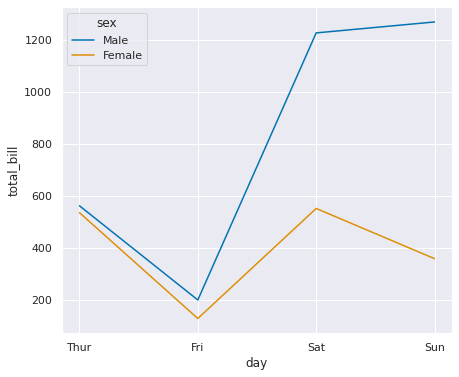

In [65]:
# https://seaborn.pydata.org/generated/seaborn.lineplot.html

sns.lineplot(x = 'day', y = 'total_bill',
             hue = 'sex',
             #style = 'time', # ou size
             ci = None,
             estimator = sum,
             # makers = True,
             # dashes = False,
             data = tips
);

### *Mapas do calor*

In [23]:
te = tips.groupby(
    by = ['day']).agg({
        'total_bill':'sum',
        'tip':'sum',
    })

In [ ]:
# num = tips[['total_bill', 'size']]

sns.heatmap(te, cmap = 'coolwarm');

### *Correlação*

In [ ]:
import seaborn as sb

dataplot = sb.heatmap(tips.corr(),
                      cmap = 'YlGnBu',
                      annot = True)

### *Outro Dataset*

In [67]:
flights = sns.load_dataset('flights')
flights = flights.pivot('month', 'year', 'passengers')
# data

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap

sns.heatmap(flights, annot = True, fmt = 'd', linewidths = .5, cmap = 'Spectral');

### *Histograma*

***Base de dados Medidas resumo***

In [ ]:
import seaborn as sns
import pandas as pd
df = pd.read_excel('/Hikaru Yamanaka - Análise Descritiva (Medidas).xlsx')
df

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(data = df,
             x = 'income',
             #y = income,
             #binwidth = 1000,
             #bins = 30,
             #kd = True,
             #hue = 'sex',
             #multiple = 'stack',
             #element = 'step',
             );

plt.axvline(x = df.income.mean(),
            color = 'red');
plt.axhline(40);            

## *Boxplot*

*Dataset tips*

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x = tips['total_bill']);

In [ ]:
sns.boxplot(x = 'day', y = 'total_bill',
            #hue = 'smoker',
            #orient = 'h',
            data = tips);

In [ ]:
sns.catplot(x = 'sex', y = 'total_bill',
            hue = 'smoker', col = 'time',
            data = tips,
            kind = 'box', #por ser do tipo catplot poderia ser bar também
            height = 6, aspect = .9);

*Com os pontos*

In [ ]:
sns.boxplot(x = 'day', y = 'total_bill', data = tips);

## *Gráfico de Dispersão*

### *Seaborn*

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data = df, x = 'age', y = 'income',
                #hue = 'region',
                #style = 'sex',
                #size = 'married'
                );

#sns.scatterplot(data = tips, x = 'total_bill', y = 'tip');

In [ ]:
# https://seaborn.pydata.org/tutorial/relational.html
sns.relplot(
    data = df, x = 'age', y = 'income',
    col = 'married', hue = 'sex', style = 'sex',
    #kind = 'line',
    #ci = None,
);

### *Plotly*

In [ ]:
import pandas as pd
url = ('https://github.com/scudilio/Visualizacao_de_dados/blob/master/datasets/gapminder_final.xlsx?raw=true')
pib = pd.read_excel(url)
pib

In [ ]:
import plotly.express as px

fig = px.scatter(pib, x = 'gdpPercap', y = 'lifeExp',
                 #log_x = True,
                 width = 800)

fig.update_traces(marker = dict(size = 12, line = dict(width = 2)),
                  selector = dict(mode = 'markers'))

fig.update_layout(title = 'PIB per capita X Expectativa de vida')
fig.update_xaxes(title = 'PIB per capita')
fig.update_yaxes(title = 'Expectativa de vida')
fig.show()

#### *Cuidados - Overplotting Soluções*

In [ ]:
df_sample = pib.sample(n = 100)

fig = px.scatter(df_sample, x = 'gdpPercap', y = 'lifeExp', width = 800,
                 #opacity = 0.5,
                 )

#fig.update_traces(marker = dict(size = 12, line = dict(width = 2)), selector = dict(mode = 'markers'))

fig.update_layout(title = 'PIB per capita X Expectativa de vida')
fig.update_xaxes(title = 'Log (PIB per capita)')
fig.update_yaxes(title = 'Expectativa de vida')
fig.show()

#### *Variações*

In [ ]:
df_2019 = pib[pib['year'] == 2019]

fig = px.scatter(df_2019, x = 'gdpPercap', y = 'lifeExp', hover_name = 'country', width = 800)
fig.show()

#### *Trivariado Categórico*


In [ ]:
fig = px.scatter(df_2019, x = 'gdpPercap', y = 'lifeExp',
                 color = 'continent',
                 size = 'pop',
                 hover_name = 'country',
                 #symbol = 'continent',
                 width = 800)

fig.update_traces(marker = dict(size = 12,
                                line = dict(width = 2)),
                  selector = dict(mode = 'markers'))

fig.show()

#### *Trivariado Numérico*

In [ ]:
fig = px.scatter(df_2019, x = 'gdpPercap', y = 'lifeExp', 
                 size = 'pop', hover_name = 'country',
                 color = 'pop',
                 size_max = 60,
                 width = 800)
fig.show()

### *Multivariado*

In [ ]:
fig = px.scatter(df_2019, x = 'gdpPercap', y = 'lifeExp', 
                 size = 'pop',
                 color = 'continent',
                 hover_name = 'country',
                 #log_x = True,
                 size_max = 60, width = 800)
fig.show()

#### *Animado*

In [ ]:
px.scatter(pib, x = 'gdpPercap', y = 'lifeExp',
           animation_frame = 'year', animation_group = 'country',
           siz = 'pop', color = 'continent', hover_name = 'country',
           log_x = True,
           wigth = 900, size_max = 60,
           range_x = [100,100000], range_y = [15,90])

#### *Linha de tendência*

In [ ]:
fig = px.scatter(df_sample, x = 'gdpPercap', y = 'lifeExp',
              hover_name = 'country',
              trendline = 'ols',
              #log_x = True,
              #trendline_options = dict(log_x = True),  ## Eixo X com escala log e ajuste transformando em log
              #size_max = 60,
              width = 800)
fig.show()